<a href="https://colab.research.google.com/github/UdaySMukherjee/Machine-Learning-Tasks/blob/main/KNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Develop a classification model using KNN Algorithm to predict dignosis of the tumor.
2. Use pedictor variables as features and diagnosis as label/target.
3. Use Python as programming language and write the code in Google Colab to demonstrate the result (accuracy, confusion metrics, precision, recall, f1-score).
4. Use attached sample dataset for training, testing and validating the model.
5. Submit the lab report for verification.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/KNNAlgorithmDataset - KNNAlgorithmDataset.csv')
print("Shape of dataset: " , df.shape)
df.describe()

Shape of dataset:  (569, 32)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


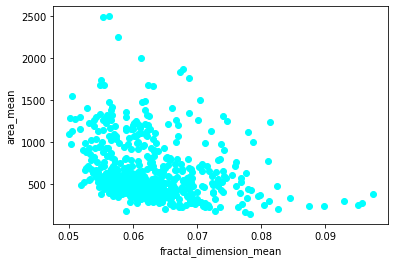

<Axes: xlabel='perimeter_mean', ylabel='area_mean'>

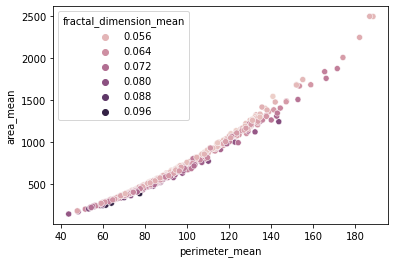

In [ ]:
plt.xlabel('fractal_dimension_mean')
plt.ylabel('area_mean')
plt.scatter(df.fractal_dimension_mean , df.area_mean , color = 'cyan')
plt.show()

sns.scatterplot(data = df , x="perimeter_mean",
                    y="area_mean",
                    hue="fractal_dimension_mean",
                )

In [ ]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
from sklearn import preprocessing
from sklearn import utils

In [ ]:
from sklearn.model_selection import train_test_split
predictors = df.iloc[: , 2:-1]
target = df.iloc[: , 1]
train_X , test_X , train_Y , test_Y = train_test_split(predictors , target , test_size = 0.1 , random_state = 0)

In [ ]:
lab = preprocessing.LabelEncoder()
train_Y_trans = lab.fit_transform(train_Y)
test_Y_trans = lab.transform(test_Y)
train_Y_trans_df = pd.DataFrame(train_Y_trans)

for index, row in train_X.iterrows():
  if(row.isnull().sum() > 0):
    print(pd.DataFrame(row[:]))


train_X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
473,12.27,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,0.1701,0.05960,...,0.003136,13.45,38.05,85.08,558.9,0.09422,0.05213,0.0000,0.00000,0.2409
102,12.18,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,0.1739,0.05677,...,0.001532,13.34,32.84,84.58,547.8,0.11230,0.08862,0.1145,0.07431,0.2694
272,21.75,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,0.1721,0.06194,...,0.004614,28.19,28.18,195.90,2384.0,0.12720,0.47250,0.5807,0.18410,0.2833
196,13.77,22.29,90.63,588.9,0.12000,0.12670,0.13850,0.06526,0.1834,0.06877,...,0.004306,16.39,34.01,111.60,806.9,0.17370,0.31220,0.3809,0.16730,0.3080
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,0.001948,19.77,24.56,128.80,1223.0,0.15000,0.20450,0.2829,0.15200,0.2650


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier(n_neighbors = 8 , weights = 'uniform' , algorithm = 'auto' )
KNN_Classifier.fit(train_X , train_Y_trans)
print("Test set prediction: {}".format(KNN_Classifier.predict(test_X)))

Test set prediction: [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = KNN_Classifier.score(test_X , test_Y_trans)
print(accuracy*100 , "%")

from sklearn.metrics import confusion_matrix
predictions = KNN_Classifier.predict(test_X)
cnf_matrix = confusion_matrix(test_Y_trans , predictions)
print(cnf_matrix)

94.73684210526315 %
[[34  1]
 [ 2 20]]
